# Analisi teorica dell'algoritmo di Grover
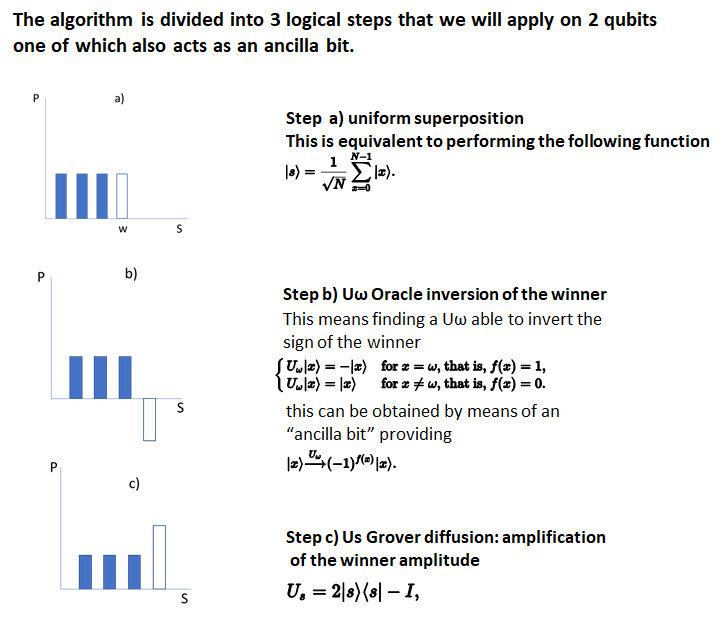

## l'algoritmo complessivo è il seguente<a id='sectionB'></a>
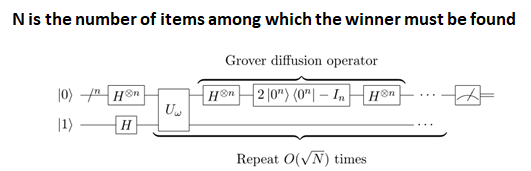

## Diamo un'occhiata al Composer... <a id='sectionB'></a>


# Applicazione dell'algoritmo di Grover

Di seguito è riportato un esempio di applicazione con QISKIT dell'algoritmo di Grover nel caso di una ricerca in una lista di 4 elementi utilizzando 2 qubit (q0 e q1 in analogia con quanto fatto nella parte Composer).

L'esercizio si basa sui seguenti passi:

1) importazione del codice

2) inizializzazione del circuito

3) sovrapposizione dell'intero sistema

4) presentazione del programma all'utente e richiesta di input per impostare il "vincitore"

5) partendo dall'assegnazione |00> --> Cuori |10> --> Quadri |01> --> Fiori |11> --> Picche, creazione condizionata di Oracoli da C-Z con visualizzazione dei vari circuiti

6) creazione di Noi da C-Z e visualizzazione del relativo circuito

7) esecuzione in modalità simulata

8) stampa e plot del risultato 


Importazione del codice
==========================
## Carichiamo le librerie Qiskit necessarie nell'ambiente Python e inizializziamo il circuito <a id='sectionB'></a>

Il circuito è inizializzato a 2 qubit: q0 e q1



In [1]:
from qiskit import IBMQ, QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, BasicAer, Aer
from ibm_quantum_widgets import CircuitComposer
#import latex
import numpy as np


## Inizializziamo il circuito<a id='sectionB'></a>

In [2]:
# creazione di un registro a 2 bit.
q = QuantumRegister(2, 'q')

# creazione del circuito 
circ = QuantumCircuit(q)

Creiamo la sovrapposizione
========================
## Applichiamo un gate di Hadamard ai due qubit realizzando uno stato di sovrapposizione 

Il circuito viene visualizzato

In [3]:
# Application of the superposition to the whole system

q0_superposition=circ.h(q[0])
circ.h(q[1])
circ.barrier()
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

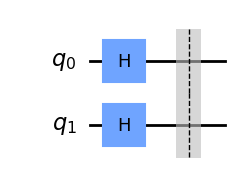

In [4]:

circuit_drawer(circ)

In [5]:
editor = CircuitComposer(circuit=circ)
editor

CircuitComposer(circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f1ec9aa3490>)

## Visualizziamo la matrice di densità dopo la sovrapposizione


In [6]:
# esecuzione del circuito quantistico 
backend = BasicAer.get_backend('statevector_simulator')
job = execute(circ, backend)
state_superposition = job.result().get_statevector(circ)
print(state_superposition)

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


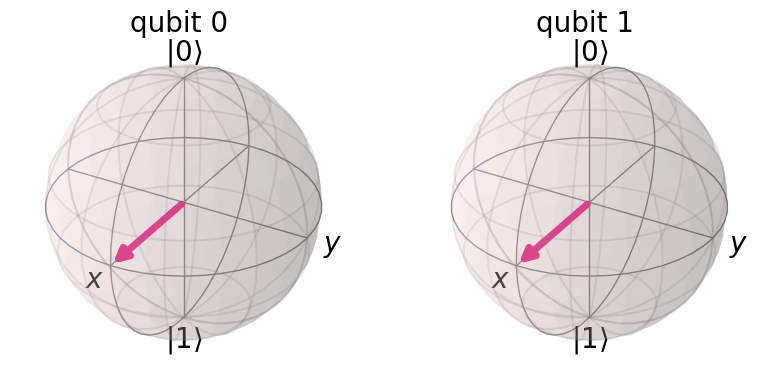

In [7]:
plot_bloch_multivector(state_superposition)

In [8]:
from qiskit.quantum_info import Statevector

# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 4)

# Evolve the state by the quantum circuit
state = state.evolve(circ)

#draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

In [9]:
# execute the quantum circuit 
from qiskit.tools.visualization import plot_state_city, plot_bloch_multivector, plot_state_paulivec, plot_state_hinton, plot_state_qsphere

# execute the quantum circuit 
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(circ, backend).result()
state_superposition  = result.get_statevector(circ)


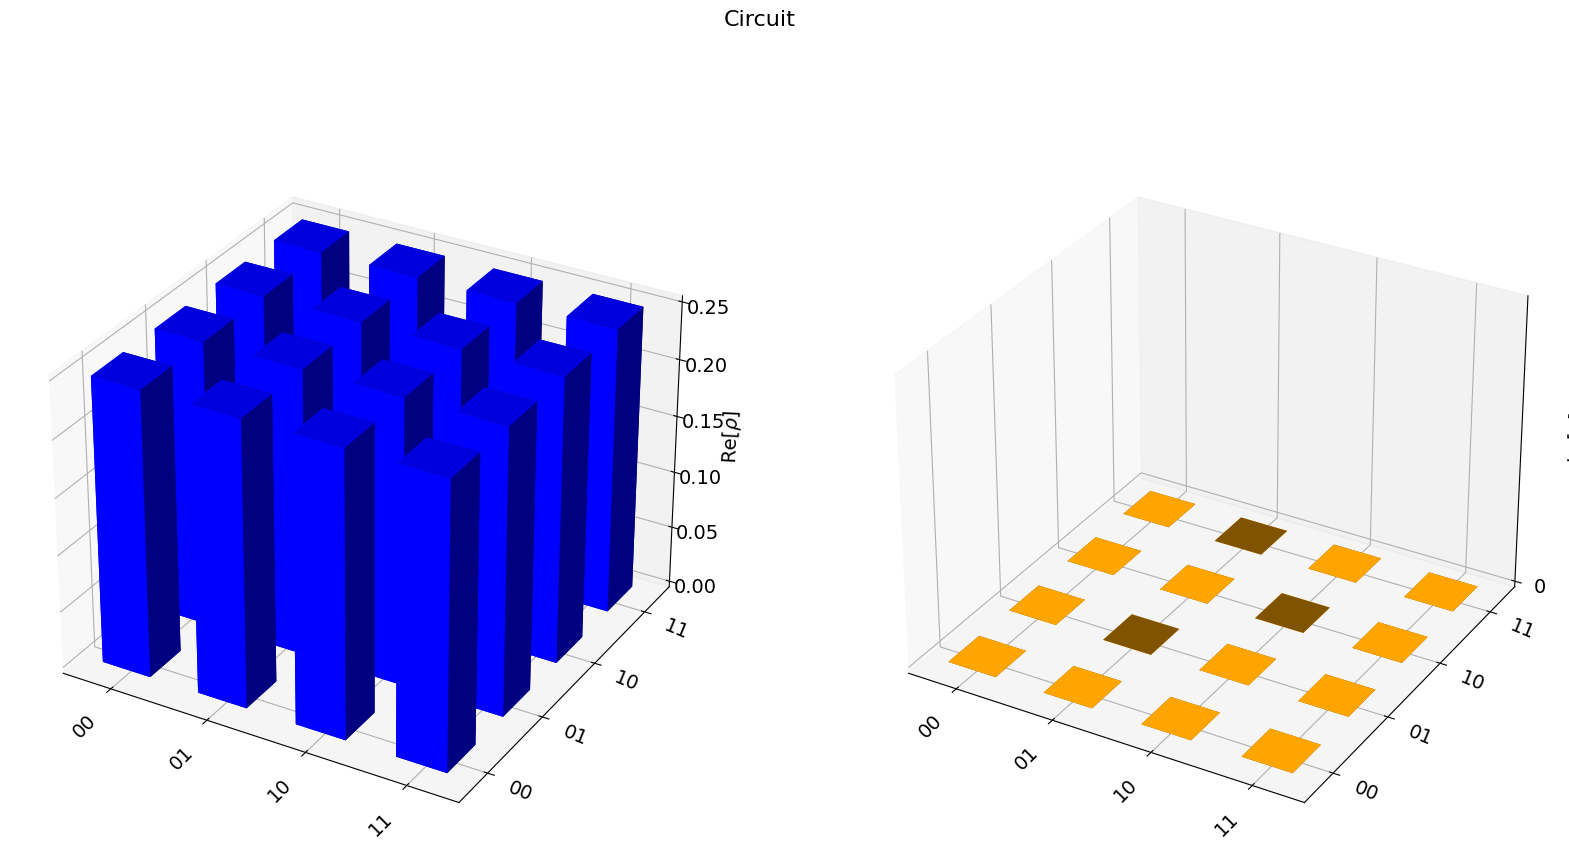

In [10]:
plot_state_city(state_superposition, figsize=(20,10), title="Circuit", color=['blue', 'orange'])

In [11]:
#plot_state_hinton(state_superposition)

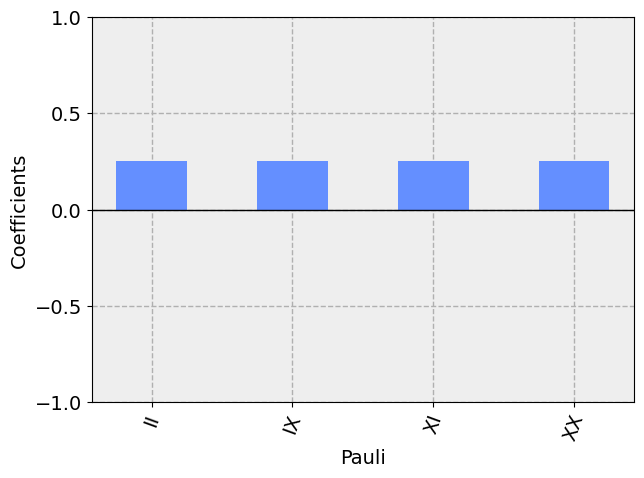

In [12]:
plot_state_paulivec(state_superposition)

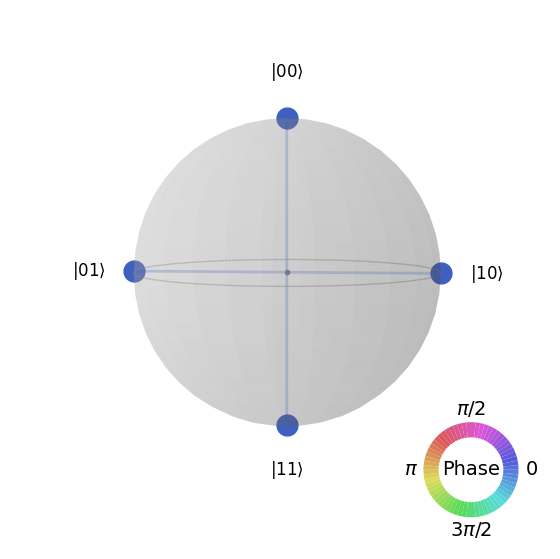

In [13]:
plot_state_qsphere(state_superposition)

## Chiediamo all'utente di definire il "vincitore".  <a id='sectionB'></a>

## reinizializziamo il circuito

In [14]:
# creazione di un registro a 2 bit.
q = QuantumRegister(2, 'q')
c0 = ClassicalRegister(1, 'c0')
c1 = ClassicalRegister(1, 'c1')
# creazione del circuito 
circ = QuantumCircuit(q,c0,c1)

circ.h(q[0])
circ.h(q[1])

In [15]:
print("\n\n\n\n===== Welcome! =====\n\n")
print("  ~~ Let's take this test ~~ ")
print("\n\n")
print("Select the winner among:")
print("a) Hearts")
print("b) Pictures")
print("c) Flowers")
print("d) Spades")
chosen = 0
while (chosen==0):
#scelta = getpass.getpass("make your choise. (a, b, c, d, e or f)\n")
    scelta = input("scegli una carta (a, b, c, d)\n")
    if scelta == "a":
        bit = "|00>"
    if scelta == "b":
        bit = "|10>"
    if scelta == "c":
        bit = "|01>"
    if scelta == "d":
        bit = "|11>"
    if scelta in ["a","b","c","d"]:
        chosen = 1

        print("Choice",scelta)
        print ("Linked to:", bit)
    else:
        print("wrong selection, retry")






===== Welcome! =====


  ~~ Let's take this test ~~ 



Select the winner among:
a) Hearts
b) Pictures
c) Flowers
d) Spades


scegli una carta (a, b, c, d)
 a


Choice a
Linked to: |00>


## Creiamo un oracolo per ciascun vincitore 
In un ciclo di if creiamo la funzione Oracolo a seconda del tipo come porta C-Z  

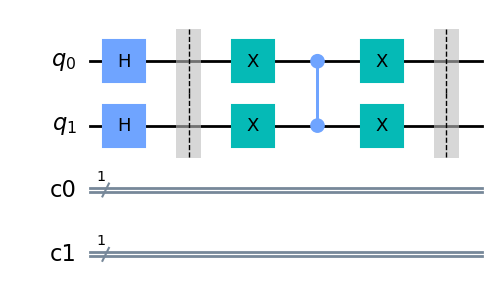

In [18]:
    if scelta == "a":
        circ.barrier()        
        circ.x(q[0])
        circ.x(q[1])
        circ.cz(q[0], q[1])
        circ.x(q[0])
        circ.x(q[1])
        circ.barrier()
#Inserite la gestione della scelta b e c
    if scelta == "b":
        print()
        #aaaa
    if scelta == "c":
        print()
        #bbbbb
    if scelta == "d":
        circ.barrier() 
        circ.cz(q[1], q[0])
        circ.barrier() 
                 
from qiskit.tools.visualization import circuit_drawer

circuit_drawer(circ)


In [19]:
editor = CircuitComposer(circuit=circ)
editor

CircuitComposer(circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f1ea221a800>)

Vediamo l'array di densità dopo l'oracolo

In [20]:
# execute the quantum circuit 
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
state_superposition = job.result().get_statevector(circ)
state_superposition

Statevector([-0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j],
            dims=(2, 2))


Trascurando la componente immaginaria dell'ordine da -10 a -16 possiamo concludere che dopo l'oracolo solo il vincitore viene invertito di segno

## Creiamo la funzione Us
che ottiene una rotazione con amplificazione di ampiezza
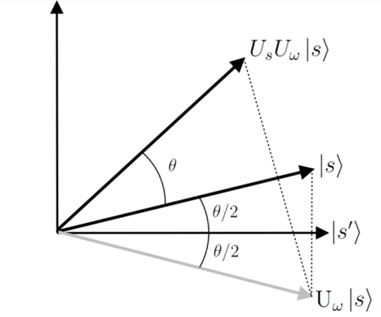

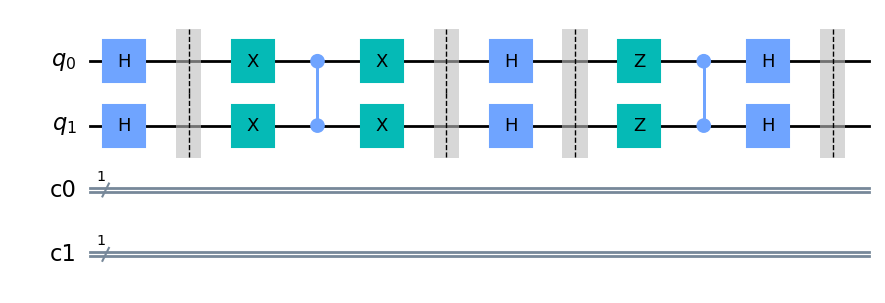

In [21]:
circ.h(q[0])
circ.h(q[1])
circ.barrier()
circ.z(q[0])
circ.z(q[1])
circ.cz(q[1], q[0])
circ.h(q[0])
circ.h(q[1])
circ.barrier()


from qiskit.tools.visualization import circuit_drawer

circuit_drawer(circ)

## Inseriamo i misuratori ed effettuiamo la misura

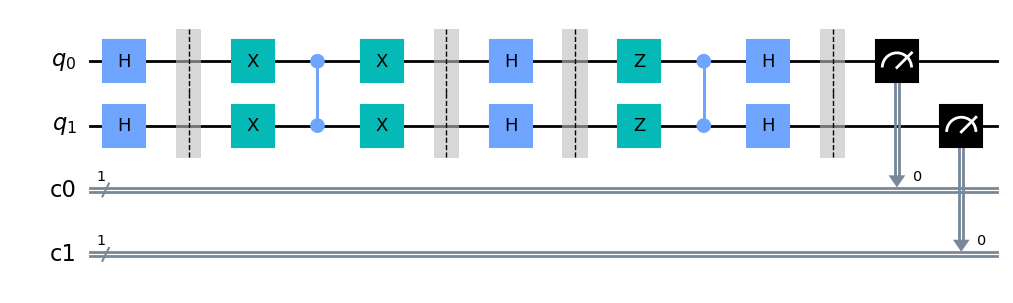

In [22]:
#measure
circ.measure(q[0], c0)
circ.measure(q[1], c1)

#drawing the circuit
circuit_drawer(circ)


## Utilizziamo il simulatore
Riportiamo i valori trovati nella misura

In [23]:

# Import Aer
from qiskit import Aer

# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job = execute(circ, backend_sim)

# Grab the results from the job.
result = job.result()

counts = result.get_counts(circ)
print("valore ", counts)

valore  {'0 0': 1024}


## Plottiamo gli istogrammi dei valori
Riportiamo i valori individuati e le occorrenze nell'insieme di letture

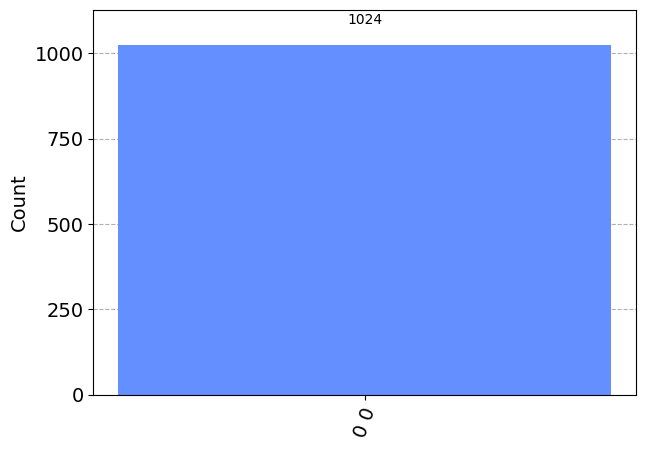

In [24]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

# Il valore precedente è stato trovato solo in un ciclo macchina

Quanti ne servono per trovare il vincitore con il circuito classico?


In [ ]:
counter=0
for i in ["a","b","c","d"]:
    counter=counter+1
    if i == scelta:
        print("winner found after ", counter) 